In [1]:
# mute Hardware optimzation messages
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = '1'

import tensorflow as tf

In [ ]:
# When using docker tensorflow/tensorflow:latest-juypter
!pip install --trusted-host pypi.org --trusted-host pypi.python.org --trusted-host files.pythonhosted.org pandas

In [4]:
# Import required libraries
import pandas as pd 
import pylab as pl
import numpy as np
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,6)

## Start the coding for linear regression

### Simple Linear Correlation 

In [5]:
X = np.arange(0.0, 5.0, 0.1)
X

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9])

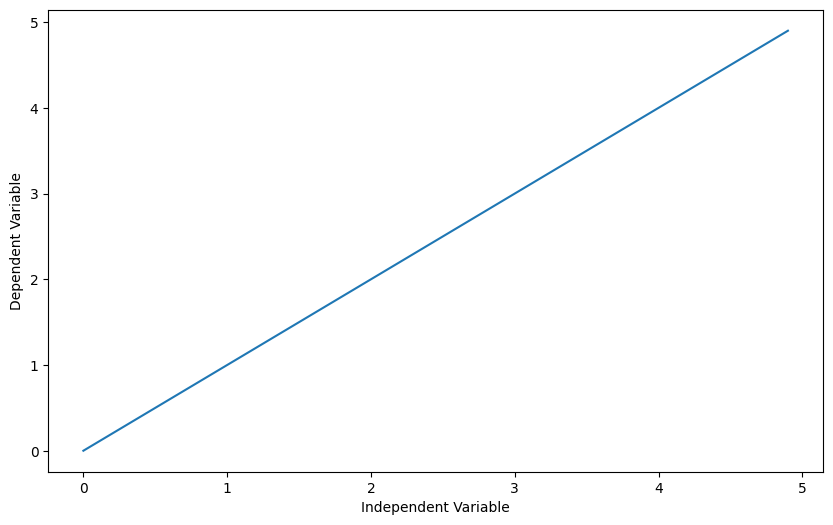

In [6]:
a = 1 # slope coefficient
b = 0 # slope intercept

# The slope
Y = a*X + b

# plot the slope
plt.plot(X,Y)
plt.ylabel("Dependent Variable")
plt.xlabel("Independent Variable")
plt.show()

<h2>Understanding the Data</h2>

<h3><code>FuelConsumption.csv</code>:</h3>
We have downloaded a fuel consumption dataset, <b><code>FuelConsumption.csv</code></b>, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. <a href="http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64">Dataset source</a>

-   **MODELYEAR** e.g. 2014
-   **MAKE** e.g. Acura
-   **MODEL** e.g. ILX
-   **VEHICLE CLASS** e.g. SUV
-   **ENGINE SIZE** e.g. 4.7
-   **CYLINDERS** e.g 6
-   **TRANSMISSION** e.g. A6
-   **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
-   **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
-   **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
-   **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0

In [9]:
# Read in the data
df = pd.read_csv("FuelConsumption.csv")

# Check dataset
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


### Check the correlation between engine size and CO2Emissions

In [10]:
# Retrieve the data
train_x = np.asanyarray(df[['ENGINESIZE']])
train_y = np.asanyarray(df[['CO2EMISSIONS']])

In [11]:
# initialize a and b
a = tf.Variable(20.0)
b = tf.Variable(30.2)

# Define the slope
def h(x):
    y = a*x+b
    return y

In [12]:
# Define a loss function to achieve as close a fit as possible
def loss_object(y, train_y):
    return tf.reduce_mean(tf.square(y - train_y))
    # or use the predefined method in keras
    #loss_object = tf.keras.losses.MeanSquaredLogarithmicError()

#### Start training and run the graph

In [13]:
learning_rate = 0.01
train_data = []
loss_values = []
a_values = []
b_values = []
# steps of looping through all the data to update the parameters
training_epochs = 200

# train model
for epoch in range(training_epochs):
    # GradientTape is used to calculate gradients
    with tf.GradientTape() as tape:
        y_predicted = h(train_x)
        loss_value = loss_object(train_y, y_predicted)
        loss_values.append(loss_value)

        # get gradients
        gradients = tape.gradient(loss_value, [b,a])

        # compute and adjust weights
        a_values.append(a.numpy())
        b_values.append(b.numpy())
        b.assign_sub(gradients[0]*learning_rate)
        a.assign_sub(gradients[1]*learning_rate)
        if epoch % 5 == 0:
            train_data.append([a.numpy(), b.numpy()])

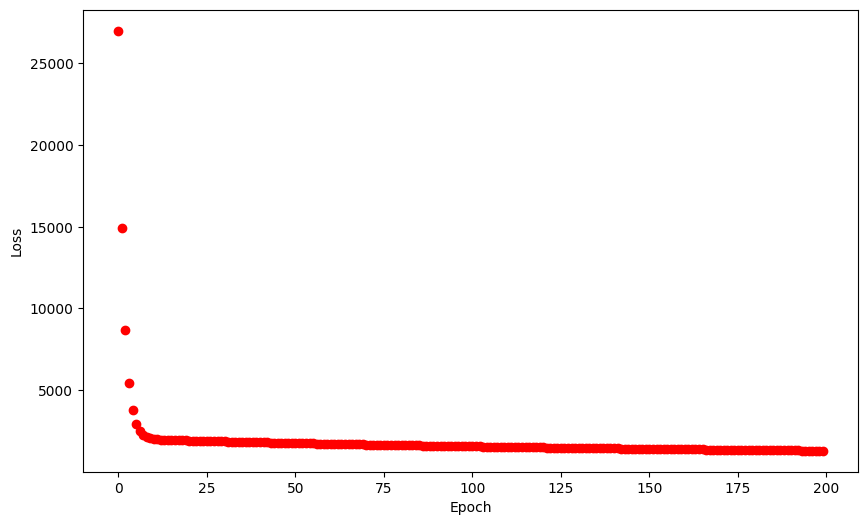

In [14]:
# Plot the loss values to identify optimal a
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(loss_values, "ro")

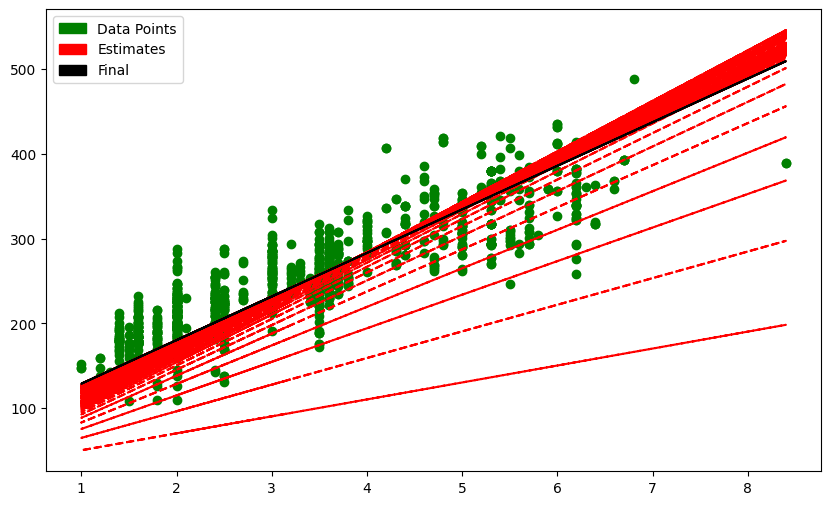

In [15]:
# Visualize change of coefficient and intercept
plt.scatter(train_x, train_y, color='green')
for a,b in zip(a_values[0:len(a_values)], b_values[0:len(b_values)]):
    plt.plot(train_x, a*train_x+b, color='red', linestyle='dashed')
plt.plot(train_x,a_values[-1]*train_x+b_values[-1], color='black')

final = mpatches.Patch(color='Black', label='Final')
estimates = mpatches.Patch(color='Red', label="Estimates")
data = mpatches.Patch(color='Green', label="Data Points")

plt.legend(handles=[data, estimates, final])

plt.show()